# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
# Your Code Here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [43]:
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv') 
display(fitbit)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [2]:
# AVERAGE STEPS BY MONTH_ENCODED
A partir de los datos de Fitbit, queremos entender visualmente
Cómo cambia la media de pasos por mes. Utiliza la visualización adecuada para mostrar la media de pasos por mes. 
¿Es Fitbitter más activo los fines de semana o los días laborables? Pistas:

Utiliza las columnas Meses_codificados y Semana_o Fin de Semana.
Utiliza la API orientada a objetos matplolib.pyplot.
Establezca su cifra de tamaño en 12,4
Explore plt.sca
Explore plt.xticks
Guarda tus figuras en una carpeta llamada figures en tu repo.

In [57]:
fitbit2 = fitbit[["Months_encoded","Work_or_Weekend","Steps"]]
display(fitbit22)

,Months_encoded,Work_or_Weekend,Steps
0,5,1,905
1,5,0,18925
2,5,0,14228
3,5,1,6756
4,5,1,502
...,...,...,...
362,5,1,18588
363,5,1,16382
364,5,1,21913
365,5,1,19023


In [60]:
media_months = fitbit2.groupby(["Months_encoded"])["Steps"].mean()
display(media)

Months_encoded
1      9892.064516
2      8922.866667
3     10312.935484
4     13079.033333
5     10620.096774
6     12536.166667
7      9193.322581
8     11584.774194
9      9191.333333
10     8272.451613
11     9467.466667
12     8470.064516
Name: Steps, dtype: float64

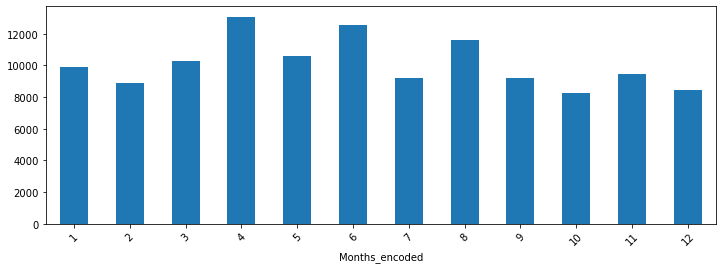

In [97]:
fitbit2.groupby(["Months_encoded"])["Steps"].mean().plot(kind="bar",figsize=(12,4))
plt.xticks(rotation=45);

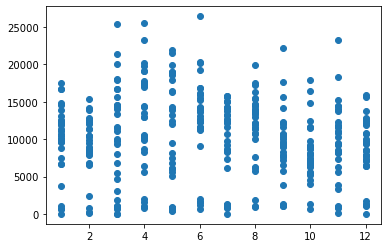

In [105]:
plt.scatter(x=fitbit2["Months_encoded"], y=fitbit2["Steps"]);

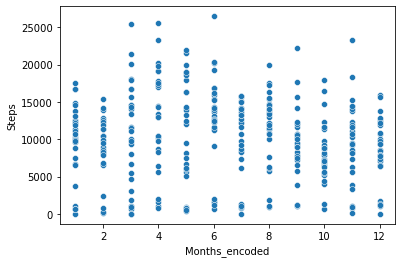

In [109]:
sns.scatterplot(x="Months_encoded", y="Steps", data=fitbit2);

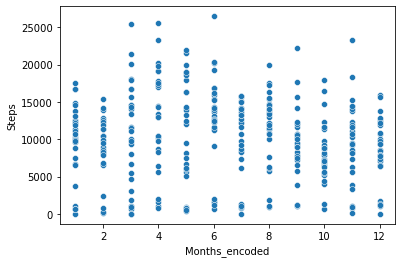

In [117]:
scatter = sns.scatterplot(x="Months_encoded", y="Steps", data=fitbit2);
scatter.figure.savefig("../scatter.jpg", dpi=1000)

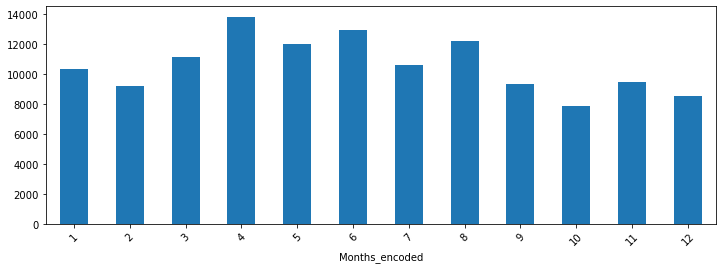

In [99]:
fitbit2.groupby(["Months_encoded"])["Steps"].median().plot(kind="bar",figsize=(12,4))
plt.xticks(rotation=45);

In [61]:
media_weekend = fitbit2.groupby(["Work_or_Weekend"])["Steps"].mean()
display(mediana)

Work_or_Weekend
0    10064.238095
1    10144.572519
Name: Steps, dtype: float64

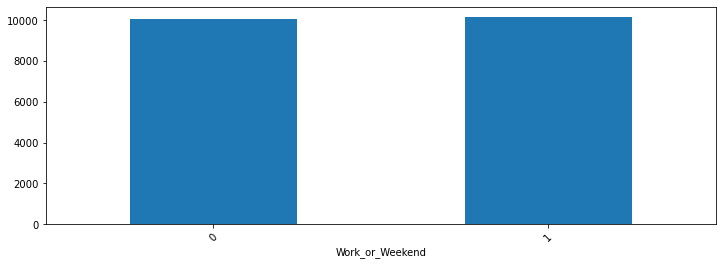

In [100]:
fitbit2.groupby(["Work_or_Weekend"])["Steps"].mean().plot(kind="bar",figsize=(12,4))
plt.xticks(rotation=45);

In [62]:
mediana_weekend = fitbit2.groupby(["Work_or_Weekend"])["Steps"].median()
display(mediana_weekend)

Work_or_Weekend
0     9998.0
1    10445.5
Name: Steps, dtype: float64

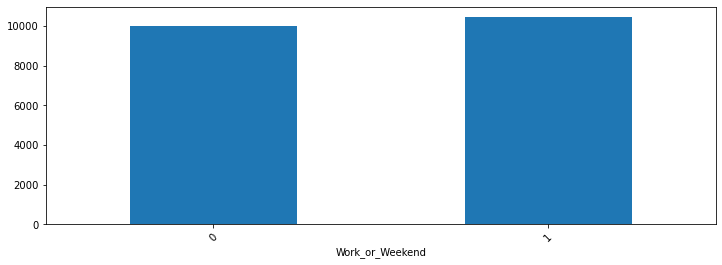

In [101]:
fitbit2.groupby(["Work_or_Weekend"])["Steps"].median().plot(kind = "bar",figsize=(12,4))
plt.xticks(rotation=45);

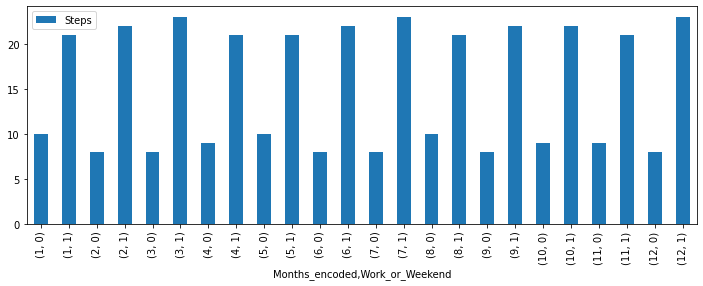

In [93]:
fitbit2.groupby(["Months_encoded","Work_or_Weekend"]).count().plot(kind = "bar",figsize=(12,4));

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [119]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


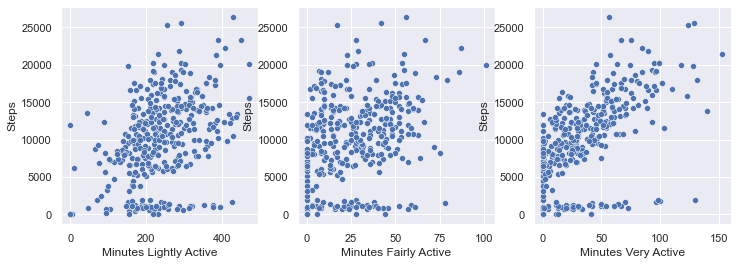

In [196]:
# your code here
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4));

x = ["Minutes Lightly Active","Minutes Fairly Active","Minutes Very Active"]

for i in range(0,3):
    sns.scatterplot(data=fitbit, x = x[i], y="Steps", ax=axs[i])

In [ ]:
Escribe un bucle para trazar 3 gráficos de dispersión de las siguientes características:
Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [8]:
# your code here
titanic = pd.read_csv('../data/titanic.csv') 
display(titanic)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [140]:
# your code here
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [142]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include=["float64","int64"], exclude="object").head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [143]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include="object", exclude=["float64","int64"]).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

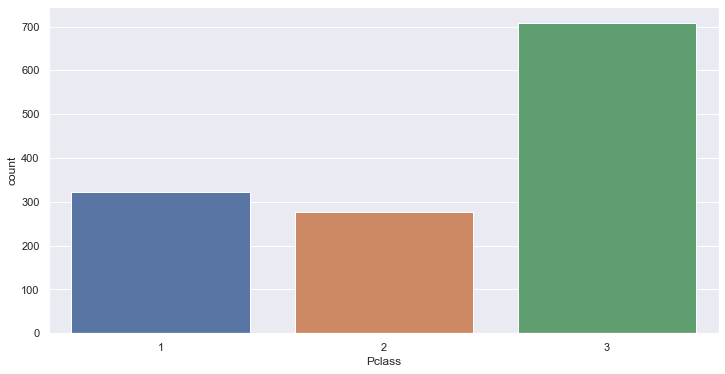

In [149]:
# your code here
sns.set(rc={"figure.figsize": (12.,6.)})
sns.countplot(x=titanic.Pclass)

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

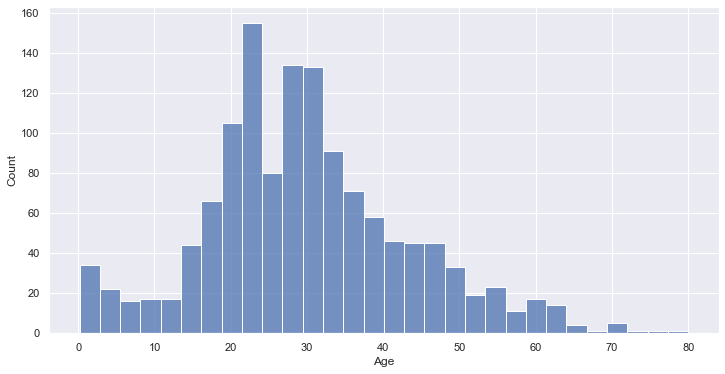

In [158]:
# your code here
sns.histplot(x=titanic.Age)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:xlabel='Age', ylabel='Count'>

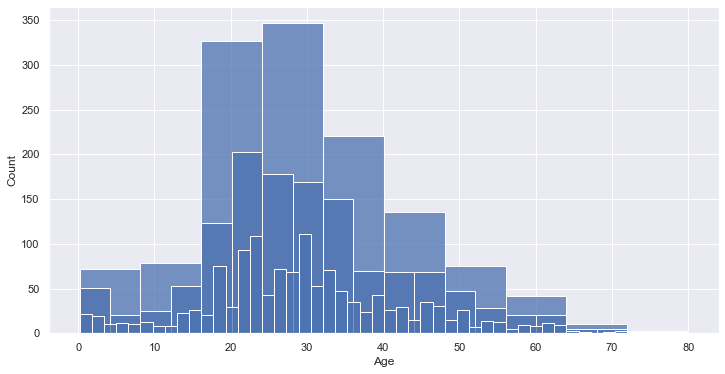

In [160]:
sns.histplot(x=titanic.Age, bins=10)
sns.histplot(x=titanic.Age, bins=20)
sns.histplot(x=titanic.Age, bins=50)

#### How does the bin size affect your plot?

In [170]:
"""
La distribución de los datos es ahora diferente por las agrupaciones que se dan. De acuerdo al intervalo se acumulan más datos en una sola franja. En los intervalos más pequeños se aplanan los datos. En elintervalo de 50, se concentran los datos en bloque, sobre todo entre los 20 y los 30 años de edad.
"""

'\nLa distribución de los datos es ahora diferente por las agrupaciones que se dan. De acuerdo al intervalo se acumulan más datos en una sola franja. En los intervalos más pequeños se aplanan los datos. En elintervalo de 50, se concentran los datos en bloque, sobre todo entre los 20 y los 30 años de edad.\n'

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='count'>

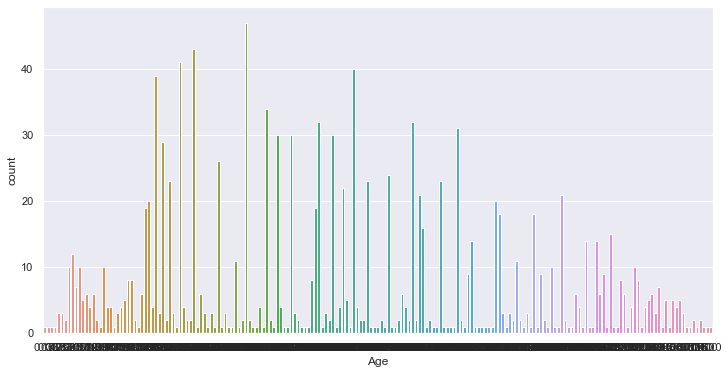

In [161]:
# your code here
sns.countplot(x=titanic.Age)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

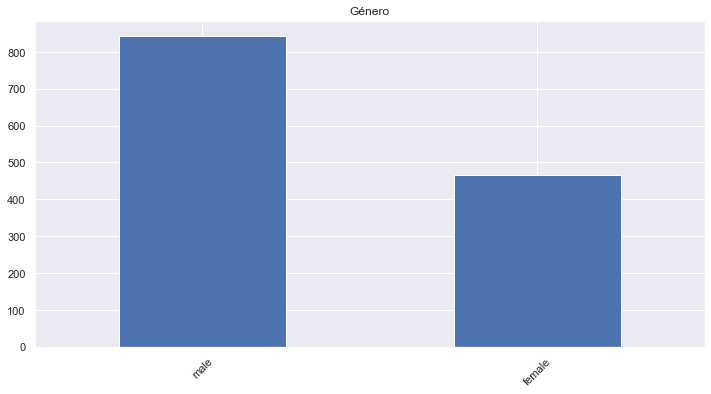

In [162]:
titanic["Gender"].value_counts().plot(kind="bar", figsize=(12,6), title="Género")
plt.xticks(rotation=45);

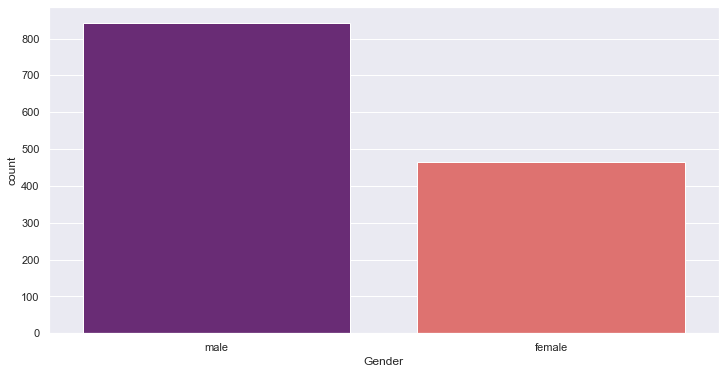

In [163]:
# Method 2 - seaborn
# your code here
sns.countplot(x="Gender", data=titanic, palette="magma");

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass'>

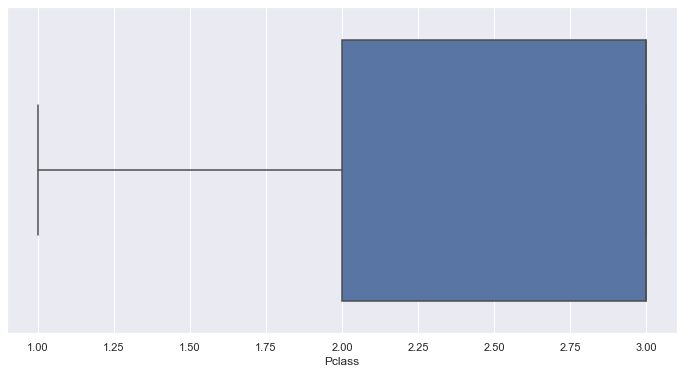

In [167]:
# your code here
sns.boxplot(x="Pclass",data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Age'>

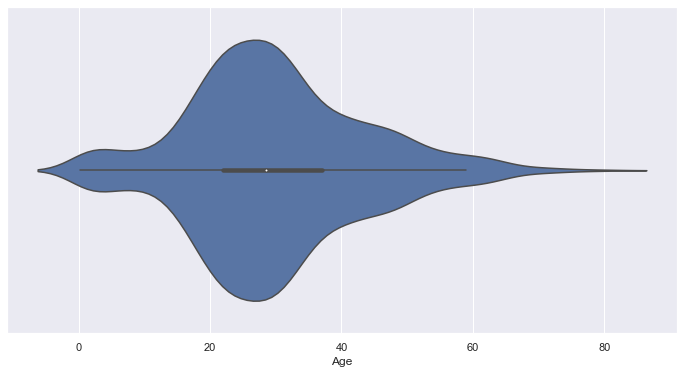

In [168]:
# your code here
sns.violinplot(x=titanic.Age)

#### What does the last plot tell you about the feature `Age`?

In [169]:
"""
La edad de la mayoria de personas del barco se encuentran entre la franja de los 20 y 40 años.
"""

'\nLa edad de la mayoria de personas del barco se encuentran entre la franja de los 20 y 40 años.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Age'>

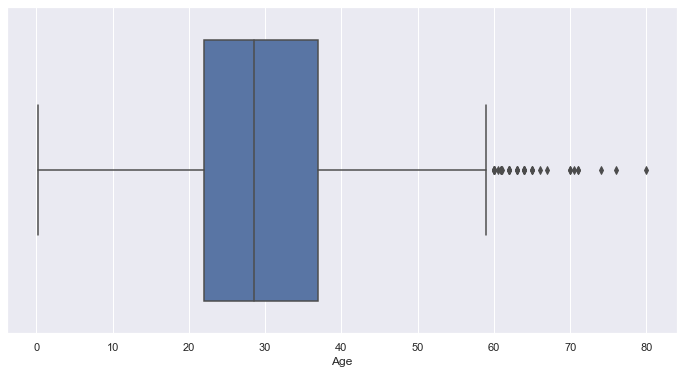

In [171]:
# your code here
sns.boxplot(x="Age", data=titanic)

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

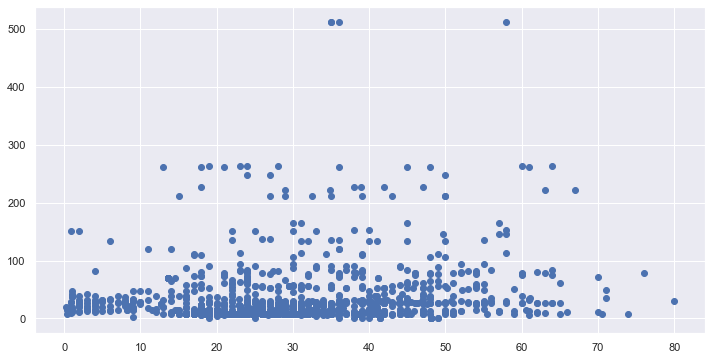

In [185]:
# Method 1 - matplotlib
# your code here
plt.scatter(x=titanic.Age, y=titanic.Fare);

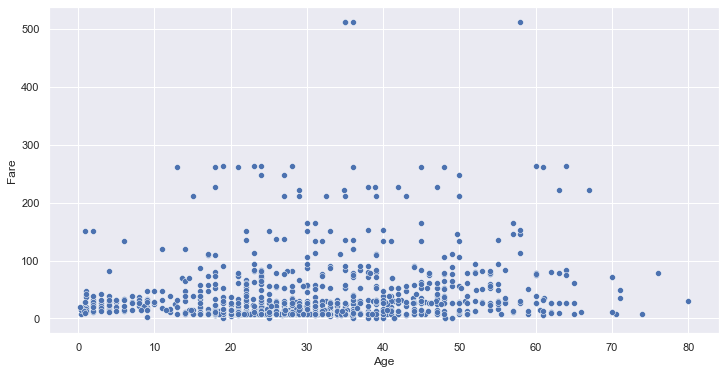

In [184]:
# Method 2 - seaborn
sns.scatterplot(x="Age", y="Fare", data=titanic);

#### Plot the correlation matrix using seaborn.

In [188]:
corr = titanic.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


In [191]:
import numpy as np

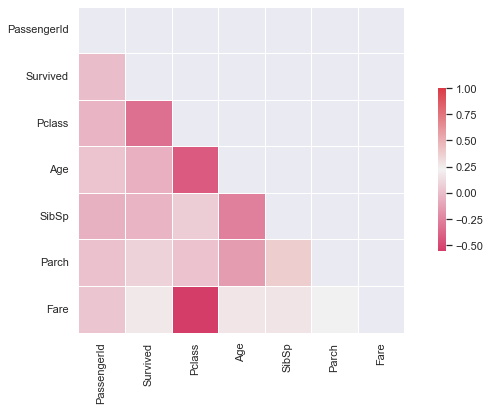

In [193]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True, 
            linewidth=0.5, 
            vmax=1,
            cbar_kws={"shrink": .5} 
);

#### What are the most correlated features?

In [ ]:
"""
Pclass y Fare son las más correlacionadas, y le sigue Age con Pclass.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

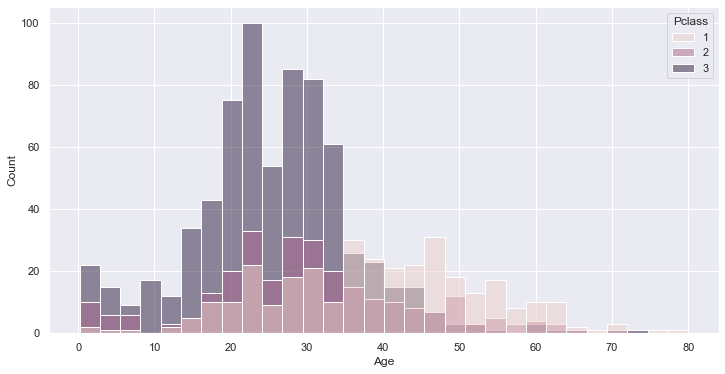

In [195]:
# your code here
sns.histplot(data=titanic, x="Age", hue="Pclass")

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [7]:
# your code here
g = sns.FacetGrid(titanic, col="Gender")
g.map(sns.histplot, "Age")

NameError: name 'titanic' is not defined

In [6]:
g = sns.FacetGrid(titanic, col="Gender")
g.map(sns.histplot, "Age")

NameError: name 'titanic' is not defined